# Generate radar pulse data for certain scattering distributions

Time is measured in units of $\tau$, the inverse bandwidth. However, sampling happens at a rate $\alpha /\tau$, where $\alpha\gg1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.integrate as integrate
from dataclasses import dataclass


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))

/tmp/ipykernel_955/1203755111.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))


[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-5.0, 5.0),
 (-20.0, 20.0)]

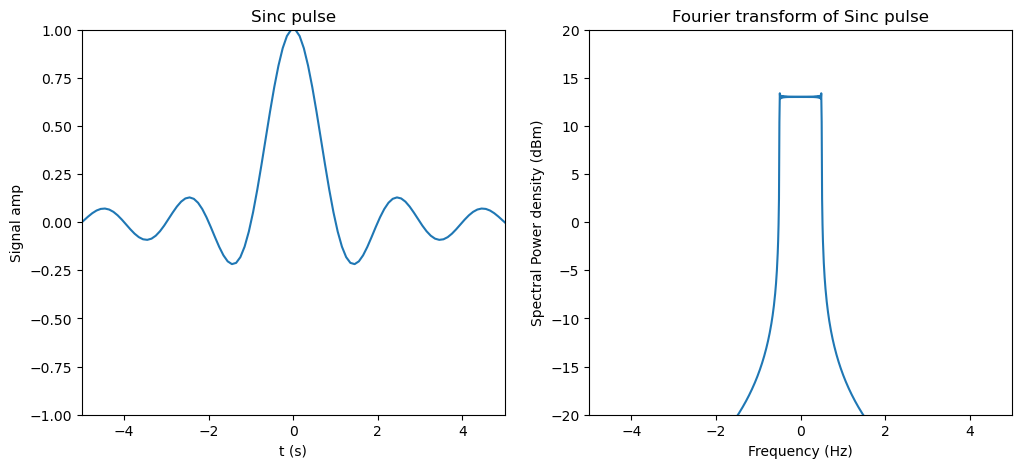

In [3]:
tau = 1.0  # s
sampling_rate = 10  # Hz
noise = 20  # dBm the noise floor of the signal.
lims = 50  # extent of plot in units of tau
tlist = np.linspace(-lims, lims, sampling_rate * lims * 2)
flist = norm2max(np.sinc(tlist))
# Compute the Fourier transform

f_sinc = fft.fft(flist)


frequencies = fft.fftfreq(tlist.size, d=1 / sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tlist, flist)  # to get unit bandwidth
ax[0].set(
    xlim=(-5, 5), ylim=(-1, 1), xlabel="t (s)", ylabel="Signal amp", title="Sinc pulse"
)
ax[1].plot(frequencies_shifted, 10 * np.log10(np.abs(f_sinc_shifted) * 2))
ax[1].set(
    xlabel="Frequency (Hz)",
    ylabel="Spectral Power density (dBm)",
    title="Fourier transform of Sinc pulse",
    xlim=(-5, 5),
    ylim=(-20, 20),
)

[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-1.5, 1.5),
 (-20.0, 20.0)]

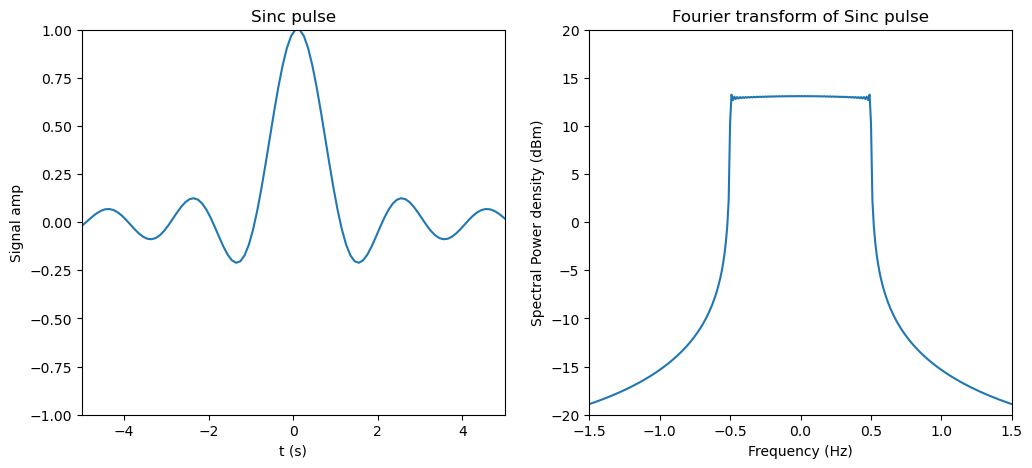

In [4]:
sep = 0.2
ret_sig = norm2max(np.sinc(tlist) + np.sinc(tlist - sep))


f_sinc = fft.fft(ret_sig)


frequencies = fft.fftfreq(tlist.size, d=1 / sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tlist, ret_sig)  # to get unit bandwidth
ax[0].set(
    xlim=(-5, 5), ylim=(-1, 1), xlabel="t (s)", ylabel="Signal amp", title="Sinc pulse"
)
ax[1].plot(frequencies_shifted, 10 * np.log10(np.abs(f_sinc_shifted) * 2))
ax[1].set(
    xlabel="Frequency (Hz)",
    ylabel="Spectral Power density (dBm)",
    title="Fourier transform of Sinc pulse",
    xlim=(-1.5, 1.5),
    ylim=(-20, 20),
)

In [5]:
max_sep = 5
sep_list = np.linspace(-max_sep, max_sep, 10000)
ret_sig_list = np.sinc(tlist) + np.sinc(tlist - sep_list[:, None])
ret_sig_list /= np.max(ret_sig_list, axis=1)[:, None]

data = np.hstack([ret_sig_list, np.abs(sep_list[:, np.newaxis])])
np.savetxt(".data/sinc_data.txt", data, delimiter=",")

(-1.1, 1.1)

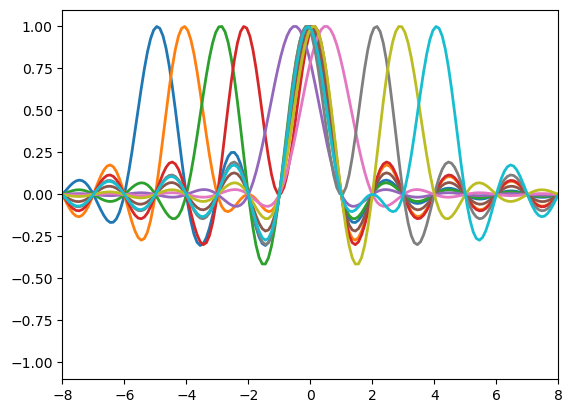

In [6]:
plt.plot(tlist, ret_sig_list.T[:, ::1000], lw=2)
plt.xlim(-8, 8)
plt.ylim(-1.1, 1.1)

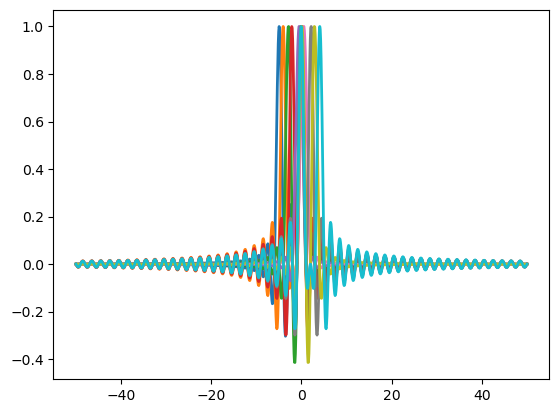

In [7]:
plt.plot(tlist, ret_sig_list.T[:, ::1000], lw=2)

# "Triangle Wave"

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


rng = np.random.default_rng()


def pulse(
    t: float,
    m: int = 10,
    omega: float = 2 * np.pi,
):
    """
    Generates the pulse to be sent out

    Parameters:
    ============

    t: time point

    m: order of decay

    omega: Bandlimit
    """
    f_n = np.polynomial.Polynomial([0, 8, 0, -14.3984, 0, 4.77612, 0, -0.82315])
    c_m = np.sinc(omega * t / (m * np.pi)) ** m
    return c_m * f_n(t)


def rec(delay, t):
    return 0.5 * (pulse(t - delay / 2) + pulse(t + delay / 2))


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))


def noisy_signal(
    t: np.ndarray,
    delay: float,
    sigma: float = 0.01,
):
    """
    Generate a noisy signal normalized to 1
    """
    return norm2max(rec(delay=delay, t=t)) + rng.normal(scale=sigma, size=t.shape[0])


def generate_waves(
    tlist: np.ndarray,
    distances: np.ndarray,
    reflectivities: np.ndarray,
):
    """
    Generates the returned signal.

    Parameters:
    ===========

    tlist: list of times to generate return signals at

    distances: distances of scatterers

    reflectivites: reflectivites of scatterers

    """

    distances = np.asarray(distances)
    reflectivities = np.asarray(reflectivities)
    # Check equal shape
    if distances.shape != reflectivities.shape:
        raise Exception("Distances and reflectivities should have the same shape.")

    # Normalize reflectivities and distances.
    # Reflectivities should all add to 1.
    pass

/tmp/ipykernel_955/3069753344.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[(-10.0, 10.0), Text(0.5, 0, 'Time (a.u.)'), Text(0, 0.5, 'Amplitude (a.u.)')]

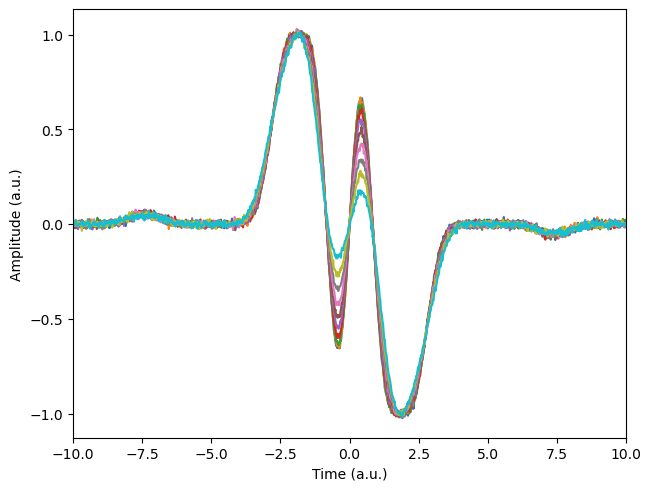

In [9]:
t = np.linspace(-10, 10, 1000)
shift_list = np.linspace(0, 0.7, 10)
ret_sigs = np.vstack([noisy_signal(t=t, delay=delay) for delay in shift_list])
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(t, ret_sigs.T)
ax.set(
    xlim=(np.min(t), np.max(t)),
    xlabel="Time (a.u.)",
    ylabel="Amplitude (a.u.)",
)

# Superfunctions

In [34]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from cycler import cycler
import scipy.integrate as integrate
import matplotlib as mpl
from itertools import product
from tqdm.auto import tqdm
from joblib import Parallel, delayed

In [2]:
w = 2 * np.pi
m1 = 1
w1 = w  # beginning frequency
w2 = 2 * w  # ending frequency
N = 6
dw = (w2 - w1) / N  # bandwidth


SampleNum = 80000
tStart = -40
tEnd = 40

t = np.linspace(tStart, tEnd, SampleNum)
dt = (tEnd - tStart) / SampleNum
Fs = 1 / dt
f = np.linspace(0, Fs, SampleNum)

In [3]:
def signal_power(tlist, signal):
    """
    Compute the rms power of the signal
    """
    return integrate.simpson(y=signal**2, x=tlist) / (tlist[-1] - tlist[0])


def normpower2one(tlist, signal):
    power = signal_power(tlist, signal)  # calculate total power
    return signal / np.sqrt(power)  # normalize signal power to 1
def basis(time, n):
    g = np.sin((w1 + dw * n) * time)  # This defines the basis we use.  Sine function for odd and cosine for even functions
    return g


def gen_sf_from_coeffs(coeffs, time):   
    g = np.zeros_like(time)
    for i in range(0, len(coeffs)):
        g = g + coeffs[i] * basis(time, i)
    return g

[Text(0.5, 1.0, '$f^{\\prime}(t)$'), (0.001, 0.003)]

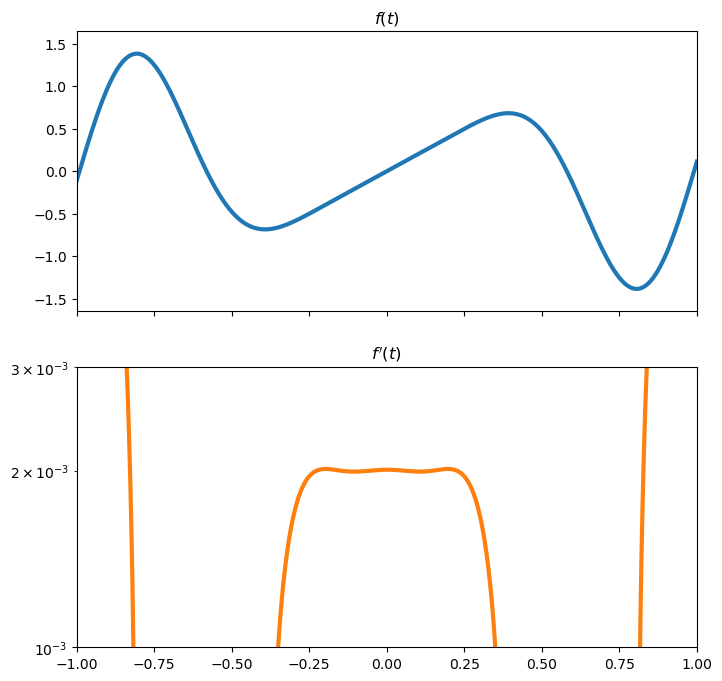

In [4]:
coeffs = [
    0.65050157,
    0.48107457,
    -0.49920901,
    -0.10730917,
    -0.29207321,
    0.15058321,
    0.07248865,
]
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
super_function = gen_sf_from_coeffs(coeffs, t)
ax[0].plot(t, super_function, lw=3)
ax[0].set(
    xlim=(-1, 1),
    title=r"$f(t)$",
)
ax[1].semilogy(t, np.gradient(super_function), color="tab:orange", lw=3)
ax[1].set(
    title=r"$f^{\prime}(t)$",
    ylim=(1e-3, 3e-3),
)

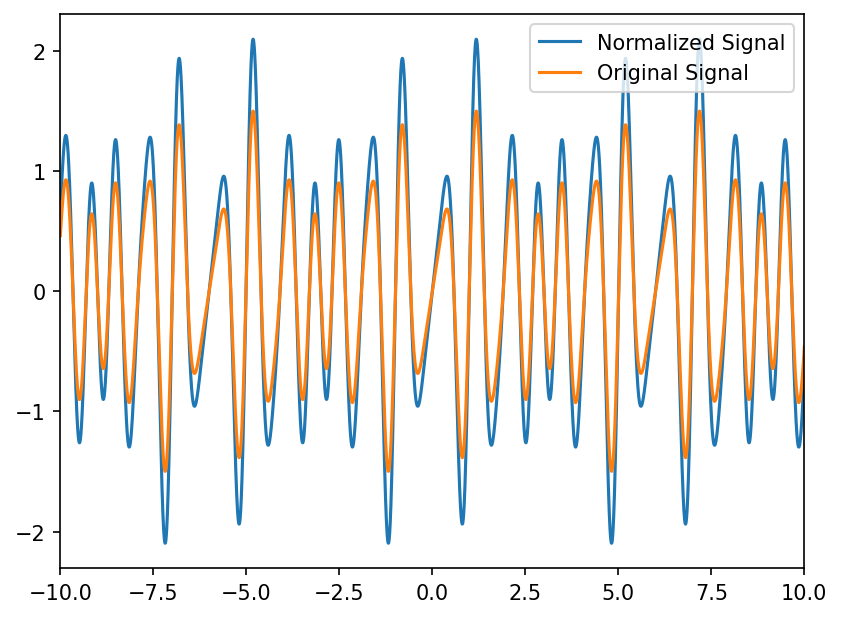

In [5]:
normed_super_function = normpower2one(t, super_function)
signal_power(t, normed_super_function)

# %% Plot the function and its fft
plt.figure(dpi=150)
plt.plot(t, normed_super_function, label="Normalized Signal")
plt.plot(t, super_function, label="Original Signal")
# plt.xlim(-0.5,0.5)
plt.xlim(-10, 10)
plt.legend()

# plt.ylim(-1, 1)
# plt.ylim(-1e-2, 1e-2)

Now, we will construct several different scattering functions. Let us first start with equally separated scatterers. We will use Gaussians of a given amplitude and width. 

In [6]:
def scatter_fn(tlist, num_scatterers, amps, locs, widths):
    """
    Generates an array with Gaussian functions.

    Parameters:
    ===========
    tlist: list of times to generate return signals at
    num_scatterers: number of Gaussians to use
    amps: amplitudes of the Gaussians
    locs: locations of the Gaussians
    widths: widths of the Gaussians
    """
    assert (
        len(amps) == len(locs) == len(widths) == num_scatterers
    ), "Mismatch in number of parameters and scatterers"

    result = np.zeros_like(tlist)
    for i in range(num_scatterers):
        result += amps[i] * np.exp(-0.5 * ((tlist - locs[i]) / widths[i]) ** 2)

    return result

def equally_spaced_scatterers(tlist, num_scatterers, sep, width=5e-3):
    """
    Generates an array with Gaussian functions.

    Parameters:
    ===========
    tlist: list of times to generate return signals at
    num_scatterers: number of Gaussians to use
    sep: separation between the Gaussians
    width: width of the Gaussians
    """
    locs = np.linspace(-sep * (num_scatterers - 1) / 2, sep * (num_scatterers - 1) / 2, num_scatterers)
    amps = np.ones(num_scatterers)
    widths = np.ones(num_scatterers) * width
    return scatter_fn(tlist, num_scatterers, amps, locs, widths)

## Generating scatterer distribution.
Below we will prepare different configurations of $N$ Gaussian scatterers uniformly separated by a given separation. 

In [7]:
cmap = mpl.colormaps["Spectral"]
cmap(1)

(0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0)

(40, 80000)

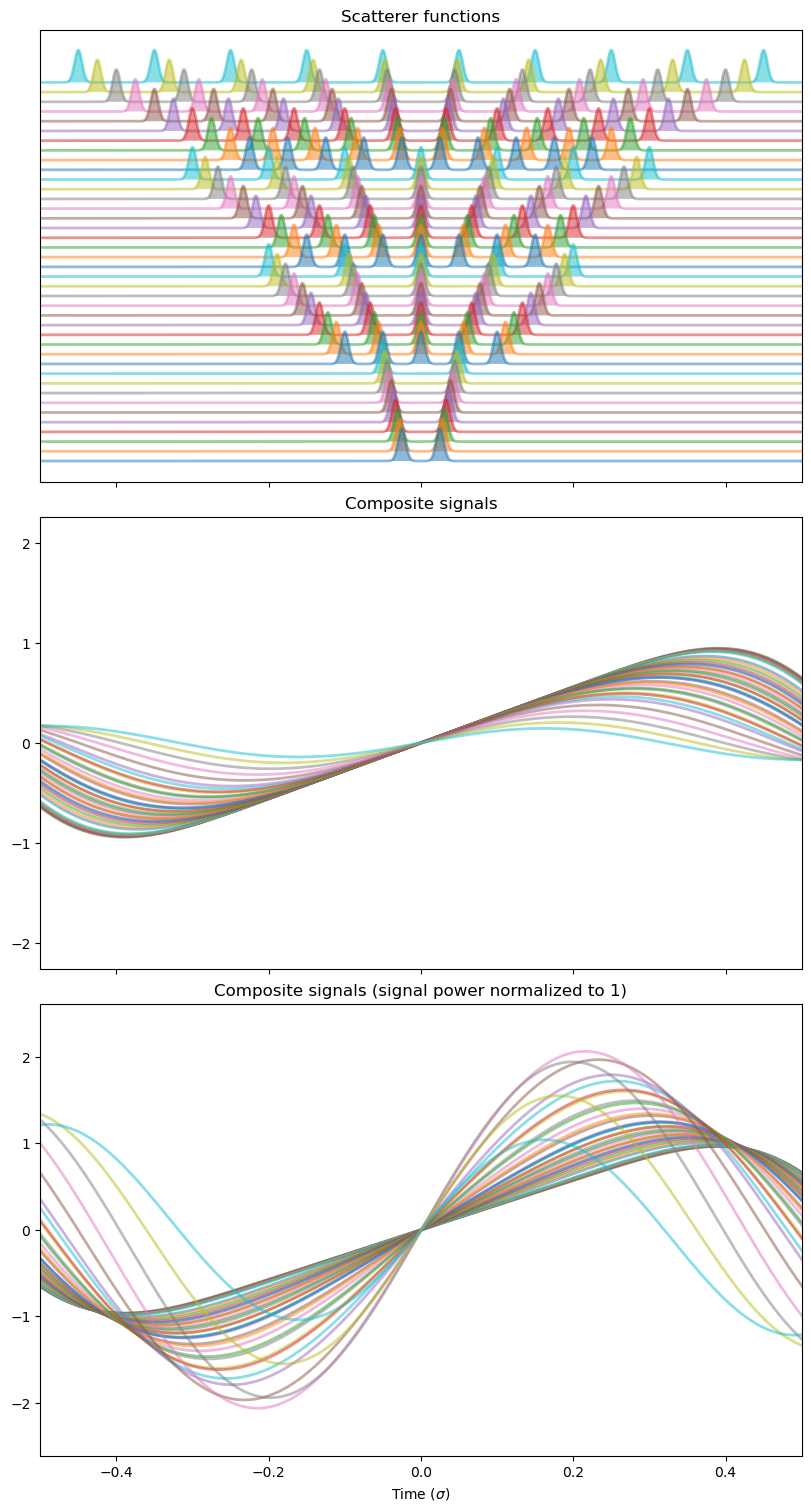

In [8]:
num_scatterer_list = [2, 5, 7, 10]
scatterer_sep_list = np.linspace(5e-2, 0.1, 10)
scatter_equal = np.vstack(
    [
        [equally_spaced_scatterers(t, ns, sep) for sep in scatterer_sep_list]
        for ns in num_scatterer_list
    ]
)
# Create the return signals
composites = np.asarray(
    [
        signal.convolve(normed_super_function, scatterer_equal, mode="same")
        / sum(scatterer_equal)
        for scatterer_equal in scatter_equal
    ]
)
normed_composites = np.asarray([normpower2one(t, comp) for comp in composites])

fig, ax = plt.subplots(3, 1, figsize=(8, 15), sharex=True, layout="constrained")
for i, scatter_dist in enumerate(scatter_equal):
    ypos = 0.3 * i
    ax[0].plot(t, scatter_dist + ypos, alpha=0.5, lw=2, zorder=-i)
    ax[0].fill_between(t, scatter_dist + ypos, ypos, alpha=0.5, zorder=-i)
# ax.plot(t, scatter_equal.T)
plot_limits = (
    np.asarray([-1, 1])
    * (np.max(num_scatterer_list))
    * np.max(scatterer_sep_list)
    * 0.5
)
ax[0].set(
    xlim=plot_limits,
    title="Scatterer functions",
    # xlabel=r"Time ($\sigma$)",
    # ylim=(-0.5, 1.5),
)
ax[0].yaxis.set_visible(False)
ax[1].plot(t, composites.T, alpha=0.5, lw=2)
ax[1].set(title="Composite signals")
ax[2].plot(t, normed_composites.T, alpha=0.5, lw=2)
ax[2].set(
    title="Composite signals (signal power normalized to 1)", xlabel=r"Time ($\sigma$)"
)
scatter_equal.shape

# ax.legend([f"{i} scatterers" for i in num_scatterer_list])

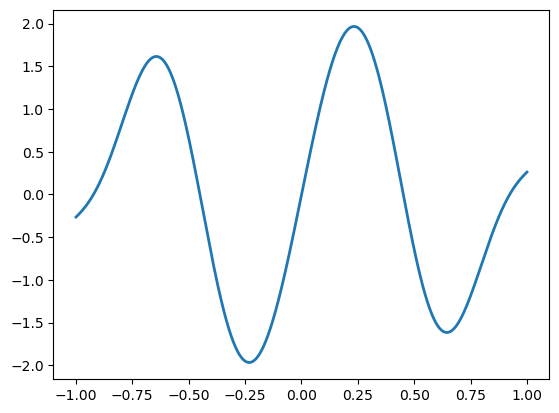

In [9]:
plt.plot(t[39000:41000], normed_composites[-5][39000:41000], lw=2)
# plt.xlim(-0.5, 0.5)

In [10]:
signal_power(t, normed_composites)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

## Superfunction dataset
Now what we have all these signals normalized to signal power 1, we can create a dataset.

Text(0.5, 1.0, 'testing data: [5.  0.1]')

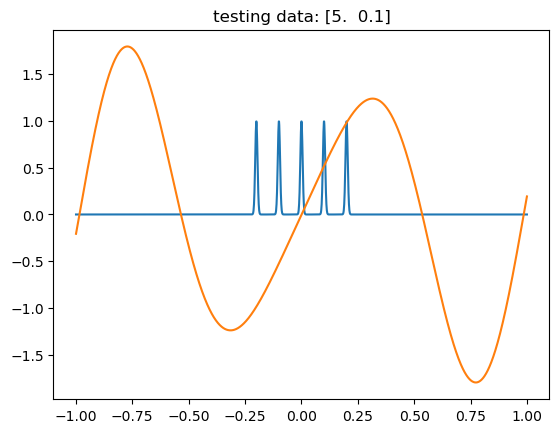

In [40]:
def create_superfunc_data(t, num_scatterers, sep):
    """
    Generate the superfunction data for a given number of scatterers and separation
    """
    coeffs = [
        0.65050157,
        0.48107457,
        -0.49920901,
        -0.10730917,
        -0.29207321,
        0.15058321,
        0.07248865,
    ]
    superfunc = gen_sf_from_coeffs(coeffs, t)
    scatterers = equally_spaced_scatterers(t, num_scatterers, sep)
    composite = signal.convolve(superfunc, scatterers, mode="same") / sum(scatterers)
    normed_composite = normpower2one(t, composite)
    return np.hstack([ scatterers[39000:41000], normed_composite[39000:41000], num_scatterers, sep])

plt.plot(t[39000:41000], create_superfunc_data(t, 5, 0.1)[:2000])
plt.plot(t[39000:41000], create_superfunc_data(t, 5, 0.1)[2000:4000])
plt.title(f"testing data: {create_superfunc_data(t, 5, 0.1)[-2:]}")

In [41]:
t[39000:41000]

array([-0.99951249, -0.99851248, -0.99751247, ...,  0.99751247,
        0.99851248,  0.99951249])

In [42]:
num_scatterer_list = range(2, 11)
scatterer_sep_list = np.linspace(5e-2, 0.1, 1000)


In [36]:
sf_dataset = np.vstack(
    [
        Parallel(n_jobs=-2, verbose=0)(delayed(create_superfunc_data)(t, ns, sep)
        for ns, sep in tqdm(
            product(num_scatterer_list, scatterer_sep_list),
            total=len(num_scatterer_list) * len(scatterer_sep_list),
        ))
    ]
)

  0%|          | 0/9000 [00:00<?, ?it/s]

In [37]:
sf_dataset.shape

(9000, 4002)

In [38]:
np.savetxt(".data/sf_dataset.txt", sf_dataset, delimiter=",")